<a href="https://colab.research.google.com/github/vartikatrao/PyTorch/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Using device:{device}")

Using device:cpu


In [4]:
weight=0.7
bias= 0.3

start =0.
end=1
step= 0.02

X= torch.arange (start, end, step).unsqueeze(dim=1)
y= weight*X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
train_split= int (0.8*len(X))
X_train, y_train= X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [9]:
def plot_predictions (trainX= X_train, trainY= y_train, testX= X_test, testY= y_test, predictions=None ):
  plt.figure(figsize=(10,7))
  plt.scatter(trainX, trainY, c="b", label="Training data")
  plt.scatter(testX, testY, c="g", label="Testing data")
  if predictions is not None:
    plt.scatter(testX, predictions, c="r", label="Predictions")
  plt.legend()

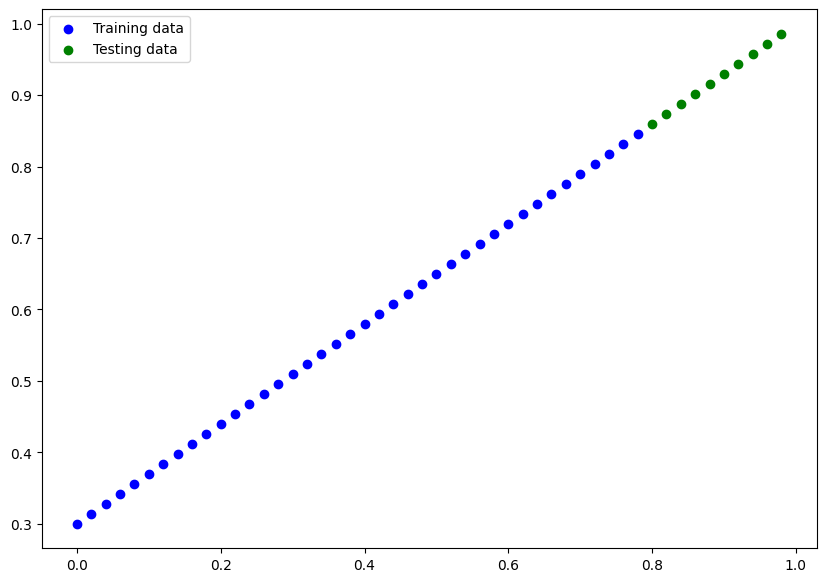

In [10]:
plot_predictions()

In [13]:
##building a model
class LinearRegressionModel (nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer= nn.Linear (in_features=1, out_features=1)
  def forward (self, x: torch.tensor)-> torch.tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1= LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Training:
- Loss function
- optimizer
- training loop
- testing loop

In [15]:
loss_fn= nn.L1Loss()
optimizer= torch.optim.Adam(params= model_1.parameters(), lr=0.01)

In [17]:
torch.manual_seed(42)
epochs=200

for epoch in range (epochs):
  model_1.train()

  #1. predict
  y_pred= model_1(X_train)

  #2. Loss
  loss= loss_fn (y_pred, y_train)

  # Optimizer to 0
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step
  optimizer.step()

  ### testing
  model_1.eval()
  with torch.inference_mode():
    test_pred= model_1(X_test)
    test_loss= loss_fn (test_pred, y_test)

  if epoch %10 ==0:
    print(f"Epoch: {epoch}    | Loss: {loss}     | test_loss: {test_loss}")

Epoch: 0    | Loss: 0.5551779866218567     | test_loss: 0.568547248840332
Epoch: 10    | Loss: 0.4161780774593353     | test_loss: 0.3795473873615265
Epoch: 20    | Loss: 0.27717819809913635     | test_loss: 0.19054758548736572
Epoch: 30    | Loss: 0.13817831873893738     | test_loss: 0.012273055501282215
Epoch: 40    | Loss: 0.06483234465122223     | test_loss: 0.15948258340358734
Epoch: 50    | Loss: 0.06953977048397064     | test_loss: 0.19462478160858154
Epoch: 60    | Loss: 0.055640317499637604     | test_loss: 0.14198970794677734
Epoch: 70    | Loss: 0.0445832796394825     | test_loss: 0.08211381733417511
Epoch: 80    | Loss: 0.035734184086322784     | test_loss: 0.0650385171175003
Epoch: 90    | Loss: 0.02559966780245304     | test_loss: 0.05930420756340027
Epoch: 100    | Loss: 0.015041230246424675     | test_loss: 0.029013926163315773
Epoch: 110    | Loss: 0.004283731337636709     | test_loss: 0.008546513505280018
Epoch: 120    | Loss: 0.0037691318430006504     | test_loss: 0.

In [20]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6953]])),
             ('linear_layer.bias', tensor([0.3000]))])

In [23]:
with torch.inference_mode():
  y_preds= model_1(X_test)
y_preds

tensor([[0.8562],
        [0.8701],
        [0.8841],
        [0.8980],
        [0.9119],
        [0.9258],
        [0.9397],
        [0.9536],
        [0.9675],
        [0.9814]])

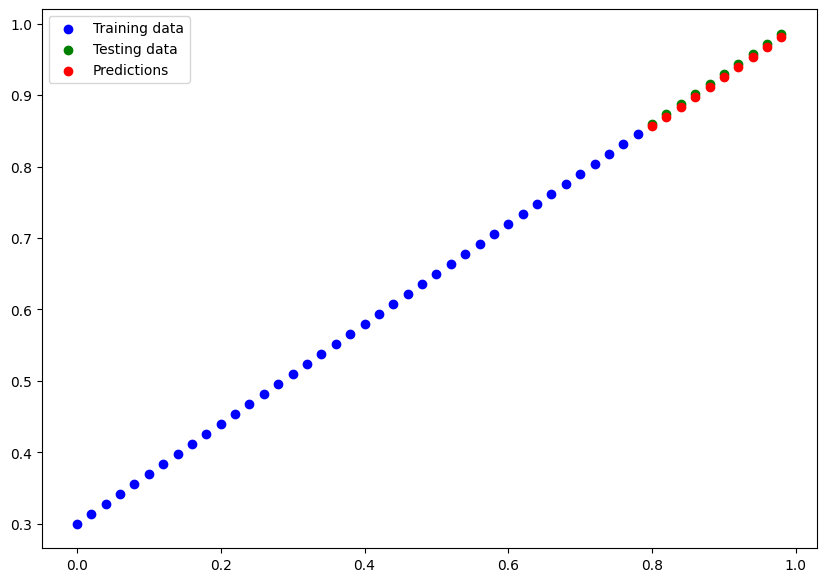

In [25]:
plot_predictions (predictions=y_preds)